In [55]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [56]:
#bring in your data, jump to the right worksheet, skip some header rows
df = pd.read_excel('2018-03-10 133917.xls', sheetname='Results', skiprows= 40)
df.tail()

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,Quantity,Quantity Mean,...,Delta Delta Ct,Automatic Ct Threshold,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Comments,HIGHSD,NOAMP,EXPFAIL
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,Analysis Type,Singleplex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,Endogenous Control,Z30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,RQ Min/Max Confidence Level,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,Reference Sample,PRIMARY HUMAN HEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#last rows we don't want, they aren't real data
df = df.iloc[:-5, :]
#change some empty values to reflect what their samples they were
df.loc[df['Task'] == 'NTC', 'Sample Name'] = 'NTC'
#lets just deal with a few columns here
df = df.loc[:, ['Sample Name','CT','Target Name','RQ','RQ Min','RQ Max']]
#lets clean up the data for QNS samples
df.loc[df['CT'] == 'Undetermined', 'CT'] = 40
df['CT'] = df['CT'].apply(pd.to_numeric)
#what are we looking at
df


,Sample Name,CT,Target Name,RQ,RQ Min,RQ Max
0,B065,27.674891,Z30,NaN,NaN,NaN
1,B065,27.671108,Z30,NaN,NaN,NaN
2,B066,26.958261,Z30,NaN,NaN,NaN
3,B066,26.952330,Z30,NaN,NaN,NaN
4,B081,25.684599,Z30,NaN,NaN,NaN
5,B081,25.550772,Z30,NaN,NaN,NaN
6,B082,26.034298,Z30,NaN,NaN,NaN
7,B082,26.062901,Z30,NaN,NaN,NaN
8,B031,24.423101,Z30,NaN,NaN,NaN
9,B031,24.396406,Z30,NaN,NaN,NaN


In [58]:
df.fillna(0, inplace=True)
# df.to_csv('mod1.csv')

In [59]:
def f(row):
    if row['CT'] > 37:
        return row['Sample Name']+'***'
    else:
        return row['Sample Name']

df['Suspect Names'] = df.apply(f, axis=1)
# df.to_csv('mod5.csv')


In [60]:
def g(row):
    if row.CT > 37:
        return 0
    else:
        return row['RQ']

df['RQ1'] = df.apply(g, axis=1)
# df.to_csv('mod6.csv')

In [61]:
def g(row):
    if row.CT > 37:
        return 0
    else:
        return row['RQ Min']

df['RQ Min1'] = df.apply(g, axis=1)
# df.to_csv('mod6.csv')

In [62]:
def g(row):
    if row.CT > 37:
        return 0
    else:
        return row['RQ Max']

df['RQ Max1'] = df.apply(g, axis=1)
# df.to_csv('mod6.csv')
#good looking file

In [63]:
#now I really only want to keep a few columns here, time to clean this df up
#do you want to do a loc to make sure you get the explicit columns?  Might be better
# df = df.iloc[:, [3,4,11,12,13]]
df = df.loc[:, ['Sample Name','Suspect Names','Target Name','RQ1','RQ Min1','RQ Max1']]
# df
df.to_csv('mod6.csv')
# df.shape
# good looking file!!!

In [64]:
#finally, time to drop some pesky duplicate rows! and some sanity checks
df = df.drop_duplicates(['Suspect Names', 'Target Name'])
# print(len(df))
# df.head()
df.to_csv('mod6.csv')
#good looking file!!!

In [65]:
#gotta make some new columns for the error bars
df['RQ Min2'] = df['RQ1'] - df['RQ Min1']
df['RQ Max2'] = df['RQ Max1'] - df['RQ1']
# df
#and get rid of the old columns that are now dead to me
df = df.loc[:, ['Sample Name','Suspect Names','Target Name','RQ1','RQ Min2','RQ Max2']]
df.head()

,Sample Name,Suspect Names,Target Name,RQ1,RQ Min2,RQ Max2
0,B065,B065,Z30,0.0,0.0,0.0
2,B066,B066,Z30,0.0,0.0,0.0
4,B081,B081,Z30,0.0,0.0,0.0
6,B082,B082,Z30,0.0,0.0,0.0
8,B031,B031,Z30,0.0,0.0,0.0


HEY YOU CRAZY END USER, ENTER YOUR HOUSEKEEPING GENE IN THE CELL BELOW!!!!

In [66]:
#lets get rid of our housekeeping gene before we start graphing
#end user:  change the value in the '' in the line immediately below this
housekeeping = 'Z30'
df = df.loc[df['Target Name'] != housekeeping]
# df.to_csv('mod6.csv')
df.head()

,Sample Name,Suspect Names,Target Name,RQ1,RQ Min2,RQ Max2
72,B065,B065,RNU6B,2.198261,0.165032,0.178428
74,B066,B066,RNU6B,1.457041,0.315984,0.403486
76,B081,B081,RNU6B,1.364707,0.251226,0.307909
78,B082,B082,RNU6B,1.437429,0.359370,0.479166
80,B031,B031,RNU6B,3.617296,0.197816,0.209259


In [67]:
genes = df['Target Name'].unique()
genes

array(['RNU6B', 'hsa-miR-122', 'hsa-miR-122a'], dtype=object)

In [68]:
def bahchaht(arrayoflabels, arrayofvalues, arrayofstdn, arrayofstdp, genename):
    N = len(arrayoflabels)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize=(10,10))
    rects1 = ax.bar(ind, arrayofvalues, width, color='r', yerr=[arrayofstdn, arrayofstdp])
    ax.set_ylabel('Fold Change')
    ax.set_title(genename)
#     plt.figure(figsize=(20,10))
    ax.set_xticks(ind)# + width / 2)
    plt.xticks(rotation=90)
    ax.set_xticklabels(arrayoflabels)
    fig.savefig(('genefig_'+genename+".jpeg"))

In [69]:
#if you don't need any samples sorted, just use this. Otherwise continue below
# for g in genes:
#     print(g)
#     aol = df.loc[df['Target Name'] == g]
#     arrayoflabels = np.array(aol['Suspect Names'])
#     arrayofvalues = np.array(aol['RQ1'])
#     arrayofstdn = np.array(aol['RQ Min2'])
#     arrayofstdp = np.array(aol['RQ Max2'])
# #     print(arrayoflabels)
# #     print(arrayofvalues)
# #     print(arrayofstdn)
# #     print(arrayofstdp)
#     bahchaht(arrayoflabels, arrayofvalues, arrayofstdn, arrayofstdp, g)
    
    
    

In [70]:
#now we want to allow the users to reorder the samples in the graph!!!
#lets give them an excel file they can go fill out!!!
names = df['Sample Name'].unique()
names= pd.DataFrame(names)
names.head()
names.columns = ['Sample Name']
names.to_excel('Sample Name2.xlsx', index=False)

HEY YOU CRAZY END USER, GO MODIFY THE 'Sample Name' EXCEL SHEET.
ADD A SECOND COLUMN CALLED 'number' AND PUT THE NUMBER YOU'D LIKE YOUR SAMPLES ORDERED BY THERE.  SAVE THE FILE.

In [71]:
#anywho having the researcher read in the new layout
#should put in a check here to assert that it's length is the same as what we are trying to do!
#I bet they skip the NTC
#oh we con do even better lets export the names of what we have so far so they can just modify the order
names1 = pd.read_excel('Sample Name2.xlsx')
result = pd.merge(names1, df, on='Sample Name', how='outer')
result = result.sort_values(by=['number'])
result.head()

,Sample Name,number,Suspect Names,Target Name,RQ1,RQ Min2,RQ Max2
0,B065,1,B065,RNU6B,2.198261,0.165032,0.178428
1,B065,1,B065,hsa-miR-122,0.426759,0.148181,0.227001
2,B065,1,B065,hsa-miR-122a,0.351946,0.094443,0.129081
3,B066,2,B066,RNU6B,1.457041,0.315984,0.403486
4,B066,2,B066,hsa-miR-122,0.523732,0.022328,0.023322


RNU6B
hsa-miR-122
hsa-miR-122a


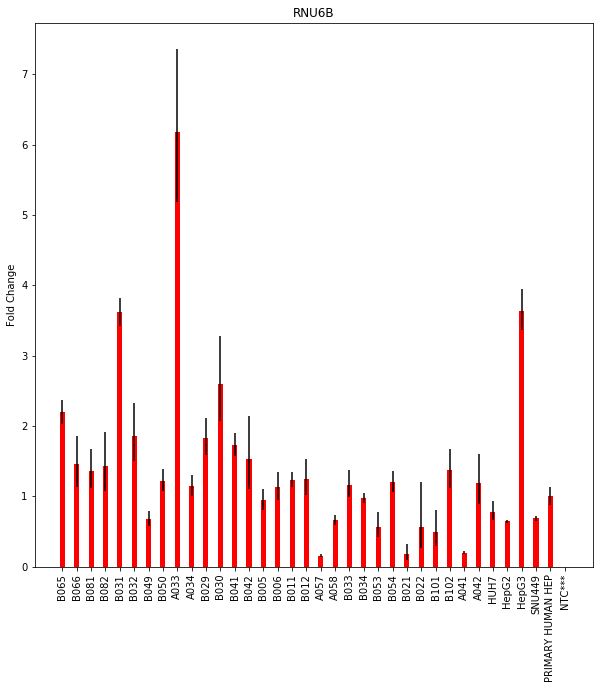

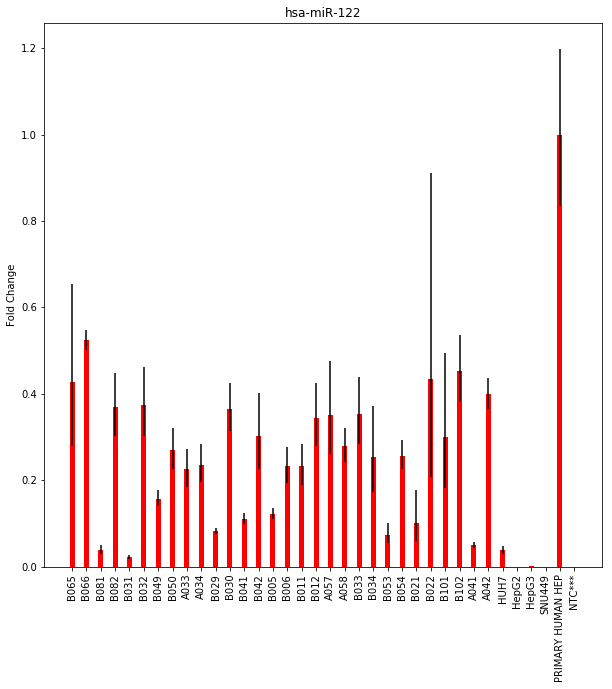

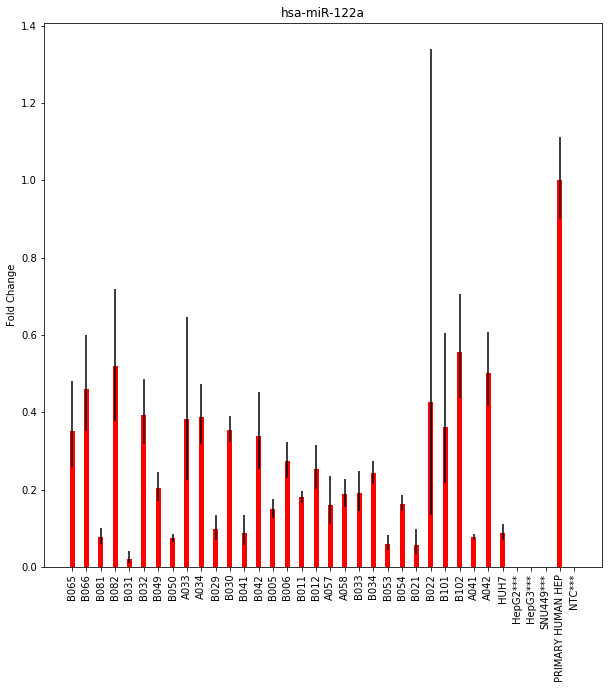

In [72]:
for g in genes:
    print(g)
    aol = result.loc[result['Target Name'] == g]
    arrayoflabels = np.array(aol['Suspect Names'])
    arrayofvalues = np.array(aol['RQ1'])
    arrayofstdn = np.array(aol['RQ Min2'])
    arrayofstdp = np.array(aol['RQ Max2'])
#     print(arrayoflabels)
#     print(arrayofvalues)
#     print(arrayofstdn)
#     print(arrayofstdp)
    bahchaht(arrayoflabels, arrayofvalues, arrayofstdn, arrayofstdp, g)
    
    